In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.decomposition import PCA
from bilinear_model import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from adjustText import adjust_text
from collections import defaultdict
plt.rcParams['font.size'] = 16

In [2]:
mean_df = pd.read_csv("connection_matrix_mean.csv", index_col = 0)

In [3]:
mean_df = mean_df.rename(index={'xbc': 'bc5xbc'})
mean_df = mean_df.sort_index().sort_index(axis=1)
mean_df

,1wt,27,2an,2aw,2o,37c,37r,37v,3i,4i,...,63,6sn,6sw,72,73,7iv/r/d,82n/wo,82wi,8w,9w
bc1,1.765638,2.078257,2.253563,2.324735,2.321309,-0.468666,-0.352261,-0.451977,1.786638,-0.879778,...,-0.491603,-1.136757,-1.138290,0.398370,0.182421,-1.089168,0.010274,-0.385499,-1.140229,-1.140229
bc2,2.214331,1.960025,2.299652,2.257118,2.137831,0.267909,0.426871,0.304961,2.165173,-0.470123,...,0.187163,-1.133315,-1.137492,0.227581,0.212052,-1.023263,-0.028737,-0.465328,-1.140229,-1.140229
bc3a,0.014845,-0.062604,0.485903,-0.158017,-0.393949,0.636029,0.717180,0.710334,1.160862,2.102363,...,1.387802,-1.055766,-1.100811,-0.607863,-0.046697,-0.926425,-0.709379,-0.921696,-1.140229,-1.140229
bc3b,0.118872,0.046328,0.584665,-0.036917,-0.257395,0.496797,0.589220,0.566447,1.188170,2.007967,...,1.291898,-1.051465,-1.098341,-0.561795,-0.025702,-0.937863,-0.670452,-0.894768,-1.140229,-1.140229
bc4,0.471432,0.402518,0.944175,0.355128,0.094079,0.722966,0.836894,0.792993,1.542472,1.828827,...,1.413330,-1.039303,-1.086604,-0.405010,0.114936,-0.923305,-0.547103,-0.821611,-1.140229,-1.140229
bc5i,-0.851685,-0.546839,-0.786281,-0.813143,-0.819216,0.181085,0.035943,0.098772,-0.710858,-0.713936,...,1.268667,2.580273,2.447052,-0.382388,0.470584,0.932348,-0.707757,-0.867421,-1.073277,-1.121080
bc5o,-0.855314,-0.620546,-0.749512,-0.814676,-0.796450,-0.250678,-0.351711,-0.307808,-0.694386,-0.528597,...,1.280664,2.419237,2.315047,-0.571565,0.244686,0.137725,-0.703260,-0.919451,-1.101646,-1.132977
bc5t,-0.856793,-0.574459,-0.723707,-0.815525,-0.791575,0.216665,0.091783,0.152937,-0.676352,-0.404399,...,1.242985,1.898121,1.609563,-0.392948,0.529689,0.874217,-0.650643,-0.878301,-1.087786,-1.128714
bc5xbc,-0.965785,-0.778030,-0.915734,-0.933525,-0.927825,-0.603829,-0.690718,-0.657270,-0.862624,-0.813653,...,0.945038,2.483194,2.608063,-0.771328,-0.140417,-0.316393,-0.845175,-0.988764,-1.113474,-1.137804
bc6,-0.573996,0.106176,-0.521340,-0.545817,-0.597708,-0.468275,-0.486316,-0.457389,-0.457782,-0.569300,...,-0.036143,0.094611,0.195177,0.638912,0.835000,-0.116227,1.768752,2.018341,1.953503,1.739948


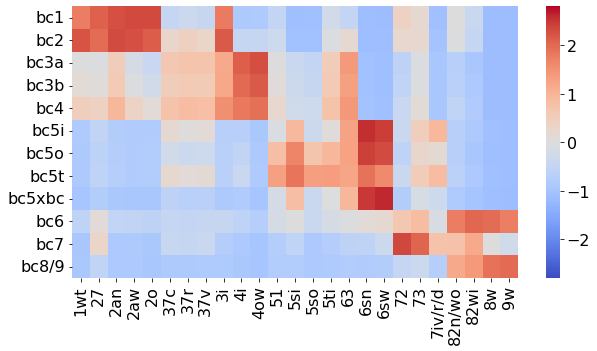

In [4]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(mean_df, cmap='coolwarm', vmin=-2.8, vmax=2.8)
plt.savefig('figure3_target.svg', format='svg', bbox_inches='tight')

In [5]:
rgc_mean_df = pd.read_csv("rgc_mean_df.csv", index_col = 0)
rgc_mean_df

,0,1,2,3,4,5,6,7,8,9,...,11313,11314,11315,11316,11317,11318,11319,11320,11321,11322
annotated,,,,,,,,,,,,,,,,,,,,,
1wt,0.734087,0.219663,0.085508,0.348167,0.229863,0.210750,-0.045596,-0.418151,-0.884077,0.062686,...,0.003005,0.013081,-0.003401,-0.000503,-0.003288,-0.018939,0.000472,0.002454,-0.001653,0.027318
27,0.266574,0.085414,0.900908,0.170533,0.211741,-0.271182,-0.144616,-0.385695,-0.482542,-0.347414,...,-0.000371,-0.000516,-0.002263,-0.002927,-0.000128,-0.002763,0.002961,-0.002036,0.001491,-0.003514
2an,-0.273371,-0.069753,0.125894,0.731196,-0.179561,-0.385569,0.321048,0.307743,-0.476605,-0.060951,...,0.002854,-0.001409,-0.000827,-0.000648,0.000662,-0.000478,0.000231,-0.000028,-0.003533,-0.000743
2aw,-0.050620,0.002029,1.217835,0.032232,-0.319361,0.325150,-0.243572,0.047176,0.293808,-0.054108,...,-0.000596,-0.001374,-0.001108,0.001013,0.000169,-0.000258,0.000152,0.002520,-0.000336,-0.000081
2o,0.262262,0.074625,0.666135,-0.182457,0.663008,-0.946841,0.070280,-0.402092,-0.673471,-0.350841,...,-0.003308,0.000735,-0.002701,-0.003693,0.004834,-0.001543,0.000467,-0.000882,-0.000807,0.001888
37c,0.151719,0.075859,0.371623,-0.521624,0.460503,-1.175089,0.167592,-0.033815,-0.022763,0.305956,...,0.004722,0.002538,-0.000804,0.002542,0.000021,-0.006295,-0.000285,-0.003541,-0.000301,0.002476
37r,0.257134,0.072888,-0.484186,0.081737,-1.096200,-0.004890,0.041373,-0.263393,0.095565,0.289155,...,-0.003840,0.000389,0.003030,0.002769,-0.004312,0.000400,0.003294,0.005890,0.003214,0.001189
37v,0.206417,0.080536,-0.252105,-0.080018,-0.733437,-0.500676,0.160943,-0.202851,0.152112,0.473210,...,0.001562,-0.001399,-0.001862,0.003782,0.002089,0.000251,-0.000962,-0.001043,-0.002247,-0.001884
3i,0.302520,0.135617,-0.090614,-0.309867,0.417917,0.230599,0.035816,0.350031,-0.198840,-0.506789,...,-0.000977,-0.003748,0.002567,0.001712,0.001563,0.001945,-0.001953,0.001972,0.000161,0.000664


In [6]:
bc_mean_df = pd.read_csv("bc_mean_df.csv", index_col = 0)
bc_mean_df

,0,1,2,3,4,5,6,7,8,9,...,3132,3133,3134,3135,3136,3137,3138,3139,3140,3141
annotated,,,,,,,,,,,,,,,,,,,,,
bc1,-0.124906,0.651657,-0.056886,-0.216782,0.045616,0.479158,-0.149424,0.049344,0.495078,0.489007,...,-0.008796,0.000440,0.007551,0.008130,0.004492,0.004298,0.016566,-0.011721,-0.011109,0.005865
bc2,-0.989565,0.777719,0.605643,-0.681671,0.449138,0.092114,-0.816348,-0.311813,-0.484495,-0.178149,...,0.007072,-0.003857,-0.004411,-0.001817,-0.002593,-0.004343,0.000431,0.016340,0.002584,0.004137
bc3a,-0.312601,0.550331,0.861689,-0.011634,0.587257,-0.017278,1.106711,0.103689,0.112572,-0.092369,...,0.002701,0.008346,0.005519,-0.010258,0.008298,-0.001294,0.005828,-0.022214,0.001030,0.000828
bc3b,1.020344,0.794336,-0.185964,0.002216,-0.263068,-0.357799,0.064340,0.071248,-0.539451,0.082165,...,-0.001006,0.001428,-0.001938,-0.002314,0.002996,-0.003004,-0.010524,0.012333,0.000123,-0.010550
bc4,0.918902,1.280392,-0.519064,0.046281,-0.185773,0.078908,-0.144013,-0.225504,0.885732,-0.304827,...,-0.000219,-0.007172,0.000995,0.009499,-0.003165,0.014747,-0.000894,0.007738,0.012197,0.005970
bc5i,0.545519,-1.074042,-0.375155,-0.419846,0.360277,-0.333709,-0.106512,0.093378,0.195083,-0.087044,...,-0.000446,-0.002343,-0.002446,0.007161,-0.002986,-0.009783,-0.002002,0.002688,0.003323,0.002638
bc5o,0.559864,-0.779252,1.362928,0.438057,-0.296719,0.316644,-0.251170,-0.139952,-0.028082,0.087289,...,-0.000734,-0.011060,-0.001595,-0.007631,0.003034,0.003682,-0.012204,-0.008704,-0.000075,0.000178
bc5t,0.187583,-0.463991,0.684399,-0.002862,-0.504875,0.545256,-0.117915,-0.032983,0.263351,-0.333134,...,0.015130,-0.003417,-0.000608,-0.006999,-0.009451,-0.003644,0.029710,0.000160,0.014374,-0.005725
bc5xbc,0.493104,-0.686548,0.159462,-0.332810,0.173096,-0.132139,-0.030842,0.425515,-0.052987,0.171214,...,-0.003294,0.020352,-0.003623,0.024810,-0.018459,0.017573,0.003789,-0.004721,-0.001314,0.000298


In [7]:
bc_pca_components = np.load('bc_pca_components.npy')
A_est = np.load('A_est.npy')
rgc_pca_components = np.load('rgc_pca_components.npy')
B_est = np.load('B_est.npy')

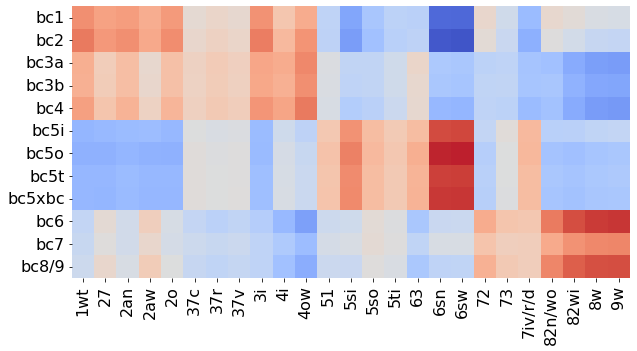

In [8]:
test = bc_mean_df.dot(A_est).dot(rgc_mean_df.dot(B_est).T)
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
heatmap = sns.heatmap(test, cmap='coolwarm', cbar = False, vmin=-2.1, vmax=2.1)
axs.set_xlabel('')
axs.set_ylabel('')
plt.savefig('figure3_estimated.svg', format='svg', bbox_inches='tight')

In [9]:
from scipy.stats import pearsonr
coef, p = pearsonr(mean_df.values.flatten(), test.values.flatten())
print (coef, p)

0.8270067284779299 1.6290204262802446e-76


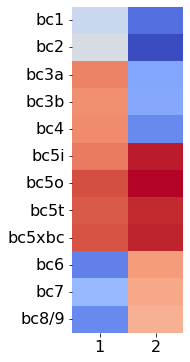

In [10]:
fig, axs = plt.subplots(1, 1, figsize=(2, 6))
sns.heatmap(bc_mean_df.dot(A_est), cmap='coolwarm', cbar = False)
axs.set_ylabel('')
axs.set_xticklabels([1, 2])
plt.savefig('figure3_bc_latent.svg', format='svg', bbox_inches='tight')

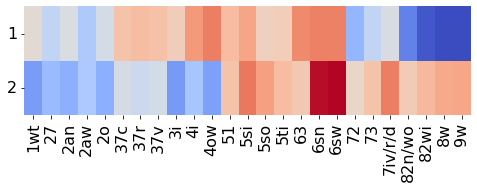

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(8, 2))
sns.heatmap(rgc_mean_df.dot(B_est).T, cmap='coolwarm', cbar = False)
axs.set_xlabel('')
axs.set_yticklabels([1, 2], rotation=0)
plt.savefig('figure3_rgc_latent.svg', format='svg', bbox_inches='tight')

In [12]:
bc_2d = bc_mean_df.dot(A_est)
bc_2d

,0,1
annotated,,
bc1,-0.398937,-1.391912
bc2,-0.267892,-1.617517
bc3a,0.650839,-0.989162
bc3b,0.574243,-0.975138
bc4,0.603404,-1.197327
bc5i,0.696848,1.150359
bc5o,0.957738,1.213291
bc5t,0.884687,1.108985
bc5xbc,0.917045,1.125418


/var/folders/yq/mt1zw2_j3d5g1lpzzv8vb0w40000gn/T/ipykernel_54225/3676974781.py:17: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  label = plt.annotate(bc_type, (x[i], y[i]), textcoords="offset points", ha='center')


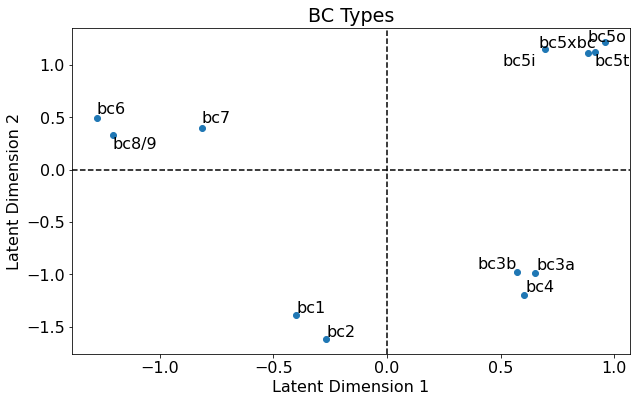

In [13]:
# Get the x and y coordinates from the dataframe
x = bc_2d[0]
y = bc_2d[1]

# Plot the points
plt.figure(figsize=(10, 6))
plt.scatter(x, y)

# Set labels for RGC types
bc_types = bc_2d.index.tolist()
labels = []
bc_labels_dim0 = defaultdict(list)
bc_value_dim0 = defaultdict()
bc_labels_dim1 = defaultdict(list)
bc_value_dim1 = defaultdict()
for i, bc_type in enumerate(bc_types):
    label = plt.annotate(bc_type, (x[i], y[i]), textcoords="offset points", ha='center')
    labels.append(label)
    if x[i] > 0:
        bc_labels_dim0['pos'].append(bc_type)
    if x[i] < 0:
        bc_labels_dim0['neg'].append(bc_type)
    if y[i] > 0:
        bc_labels_dim1['pos'].append(bc_type)
    if y[i] < 0:
        bc_labels_dim1['neg'].append(bc_type)
    bc_value_dim0[bc_type] = x[i]
    bc_value_dim1[bc_type] = y[i]

# Adjust the positions of the text labels to avoid overlaps
adjust_text(labels)

# Add dashed lines for value of 0 in Dimension 0 and Dimension 1
plt.axhline(0, color='black', linestyle='dashed')
plt.axvline(0, color='black', linestyle='dashed')

# Set title and axis labels
plt.title('BC Types')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')

# Save the figure
plt.savefig('figure3_bc_2d_plot.svg', format='svg', bbox_inches='tight')

# Show the plot
plt.show()

In [14]:
rgc_2d = rgc_mean_df.dot(B_est)
rgc_2d

,0,1
annotated,,
1wt,-0.018614,-0.829130
27,-0.316113,-0.597374
2an,-0.117317,-0.693544
2aw,-0.457810,-0.469913
2o,-0.179139,-0.698683
37c,0.232432,-0.153841
37r,0.284628,-0.239486
37v,0.246010,-0.181552
3i,0.126463,-0.840826


/var/folders/yq/mt1zw2_j3d5g1lpzzv8vb0w40000gn/T/ipykernel_54225/1125195217.py:17: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  label = plt.annotate(rgc_type, (x[i], y[i]), textcoords="offset points", ha='center')


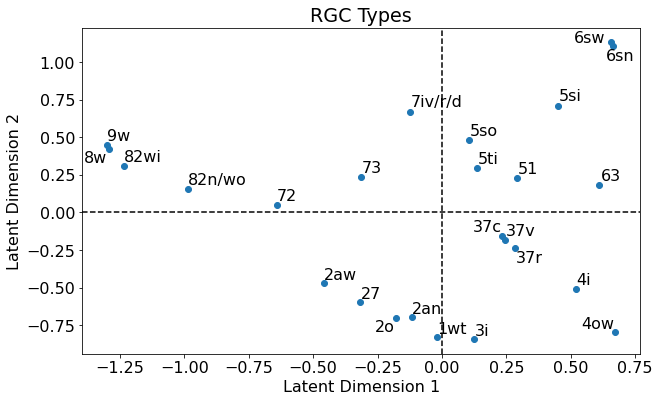

In [15]:
# Get the x and y coordinates from the dataframe
x = rgc_2d[0]
y = rgc_2d[1]

# Plot the points
plt.figure(figsize=(10, 6))
plt.scatter(x, y)

# Set labels for RGC types
rgc_types = rgc_2d.index.tolist()
labels = []
rgc_labels_dim0 = defaultdict(list)
rgc_value_dim0 = defaultdict()
rgc_labels_dim1 = defaultdict(list)
rgc_value_dim1 = defaultdict()
for i, rgc_type in enumerate(rgc_types):
    label = plt.annotate(rgc_type, (x[i], y[i]), textcoords="offset points", ha='center')
    labels.append(label)
    if x[i] > 0:
        rgc_labels_dim0['pos'].append(rgc_type)
    if x[i] < 0:
        rgc_labels_dim0['neg'].append(rgc_type)
    if y[i] > 0:
        rgc_labels_dim1['pos'].append(rgc_type)
    if y[i] < 0:
        rgc_labels_dim1['neg'].append(rgc_type)
    rgc_value_dim0[rgc_type] = x[i]
    rgc_value_dim1[rgc_type] = y[i]

# Adjust the positions of the text labels to avoid overlaps
adjust_text(labels)

# Add dashed lines for value of 0 in Dimension 0 and Dimension 1
plt.axhline(0, color='black', linestyle='dashed')
plt.axvline(0, color='black', linestyle='dashed')

# Set title and axis labels
plt.title('RGC Types')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')

# Save the figure
plt.savefig('figure3_rgc_2d_plot.svg', format='svg', bbox_inches='tight')

# Show the plot
plt.show()

In [16]:
# Save the dictionaries to files
with open('bc_labels_dim0.pickle', 'wb') as f:
    pickle.dump(bc_labels_dim0, f)

with open('bc_labels_dim1.pickle', 'wb') as f:
    pickle.dump(bc_labels_dim1, f)
    
# Save the dictionaries to files
with open('bc_value_dim0.pickle', 'wb') as f:
    pickle.dump(bc_value_dim0, f)

with open('bc_value_dim1.pickle', 'wb') as f:
    pickle.dump(bc_value_dim1, f)

In [17]:
# Save the dictionaries to files
with open('rgc_labels_dim0.pickle', 'wb') as f:
    pickle.dump(rgc_labels_dim0, f)

with open('rgc_labels_dim1.pickle', 'wb') as f:
    pickle.dump(rgc_labels_dim1, f)
    
# Save the dictionaries to files
with open('rgc_value_dim0.pickle', 'wb') as f:
    pickle.dump(rgc_value_dim0, f)

with open('rgc_value_dim1.pickle', 'wb') as f:
    pickle.dump(rgc_value_dim1, f)

In [18]:
rgc_2d_1 = pd.DataFrame(rgc_2d[0])
bc_2d_1 = pd.DataFrame(bc_2d[0])

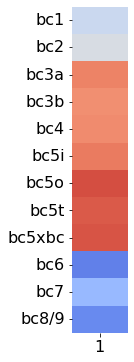

In [19]:
fig, axs = plt.subplots(1, 1, figsize=(1, 6))
sns.heatmap(bc_2d_1, cmap='coolwarm', cbar = False, vmin=bc_2d.min().min(), vmax=bc_2d.max().max())
axs.set_ylabel('')
axs.set_xticklabels([1])
plt.savefig('figure3_bc_latent1.svg', format='svg', bbox_inches='tight')

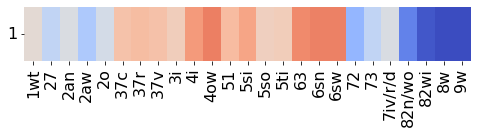

In [20]:
fig, axs = plt.subplots(1, 1, figsize=(8, 1))
sns.heatmap(rgc_2d_1.T, cmap='coolwarm', cbar = False, vmin=rgc_2d.min().min(), vmax=rgc_2d.max().max())
axs.set_xlabel('')
axs.set_yticklabels([1], rotation=0)
plt.savefig('figure3_rgc_latent1.svg', format='svg', bbox_inches='tight')

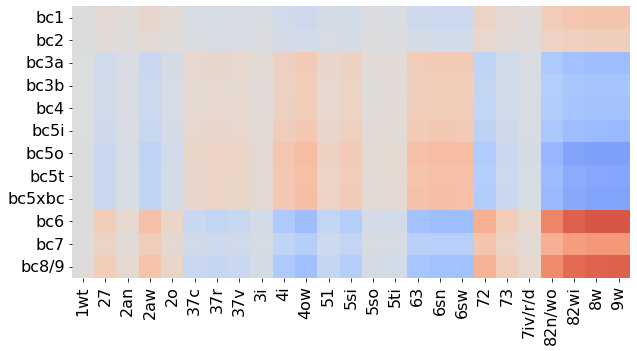

In [21]:
test1 = bc_2d_1.dot(rgc_2d_1.T)
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
heatmap = sns.heatmap(test1, cmap='coolwarm', cbar = False, vmin=-2.1, vmax=2.1)
axs.set_xlabel('')
axs.set_ylabel('')
plt.savefig('figure3_bc_rgc_2d_plot1.svg', format='svg', bbox_inches='tight')

In [22]:
rgc_2d_2 = pd.DataFrame(rgc_2d[1])
bc_2d_2 = pd.DataFrame(bc_2d[1])

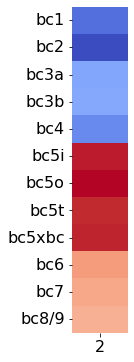

In [23]:
fig, axs = plt.subplots(1, 1, figsize=(1, 6))
sns.heatmap(bc_2d_2, cmap='coolwarm', cbar = False, vmin=bc_2d.min().min(), vmax=bc_2d.max().max())
axs.set_ylabel('')
axs.set_xticklabels([2])
plt.savefig('figure3_bc_latent2.svg', format='svg', bbox_inches='tight')

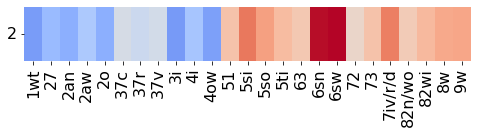

In [24]:
fig, axs = plt.subplots(1, 1, figsize=(8, 1))
sns.heatmap(rgc_2d_2.T, cmap='coolwarm', cbar = False, vmin=rgc_2d.min().min(), vmax=rgc_2d.max().max())
axs.set_xlabel('')
axs.set_yticklabels([2], rotation=0)
plt.savefig('figure3_rgc_latent2.svg', format='svg', bbox_inches='tight')

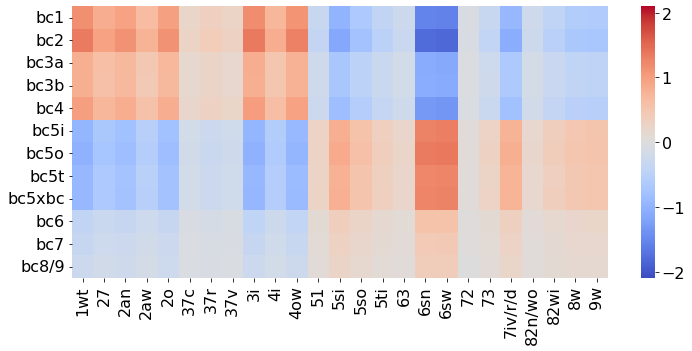

In [25]:
test2 = bc_2d_2.dot(rgc_2d_2.T)
fig, axs = plt.subplots(1, 1, figsize=(12, 5))
heatmap = sns.heatmap(test2, cmap='coolwarm', vmin=-2.1, vmax=2.1)
axs.set_xlabel('')
axs.set_ylabel('')
plt.savefig('figure3_bc_rgc_2d_plot2.svg', format='svg', bbox_inches='tight')

In [26]:
# difference between estimated and target matrix
diff = abs(mean_df - test)/(abs(mean_df) + abs(test))

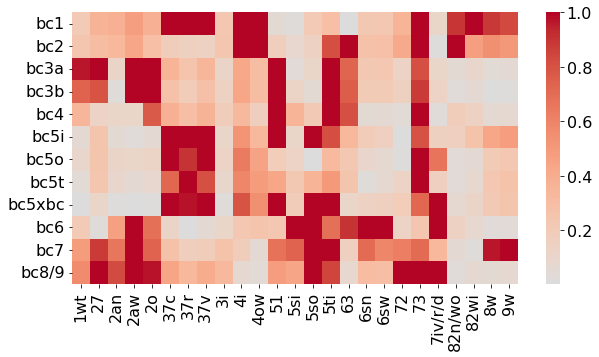

In [27]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(diff, cmap='coolwarm', center = 0.0)
plt.savefig('figure3_diff.svg', format='svg', bbox_inches='tight')

In [28]:
diff[diff < 0.5] = np.nan
diff[diff > 0.5] = 1.0
diff[mean_df < 0.0] = np.nan
diff[test > 0.0] = np.nan

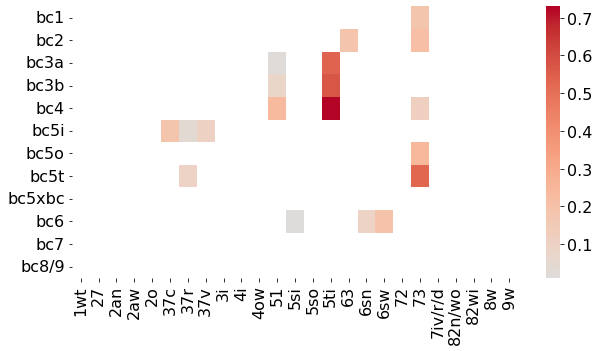

In [29]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(diff*mean_df, cmap='coolwarm', center = 0.0)
plt.savefig('figure3_diff_filtered_target.svg', format='svg', bbox_inches='tight')

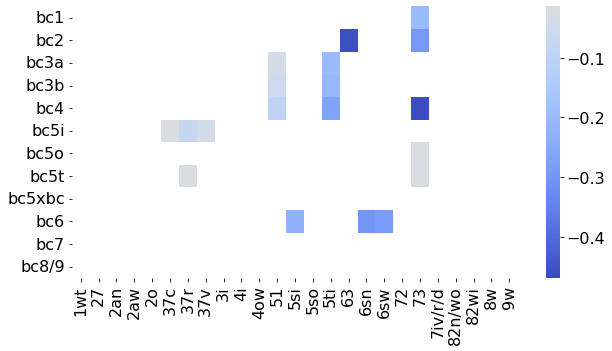

In [30]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(diff*test, cmap='coolwarm', center = 0.0)
plt.savefig('figure3_diff_filtered_estimated.svg', format='svg', bbox_inches='tight')

In [31]:
# number of positive entries in mean_df
mean_df_pos = (mean_df > 0.0)
mean_df_pos.sum().sum()

115

In [32]:
# how many entries are missed
diff.count().sum()

19

In [33]:
# percentage
diff.count().sum()/mean_df_pos.sum().sum()

0.16521739130434782